In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
plt.style.use('seaborn')

In [3]:
df_path = os.getcwd()

In [4]:
os.listdir()

['winequality-red.csv',
 '.ipynb_checkpoints',
 'Predict_wine_quality.ipynb',
 'winequality-white.csv']

In [5]:
df_path_red = os.path.join(os.getcwd(), 'winequality-red.csv')
df_path_white = os.path.join(os.getcwd(), 'winequality-white.csv')

In [6]:
df_red = pd.read_csv(df_path_red, sep = ';')
df_white = pd.read_csv(df_path_white, sep = ';')

In [7]:
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [8]:
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


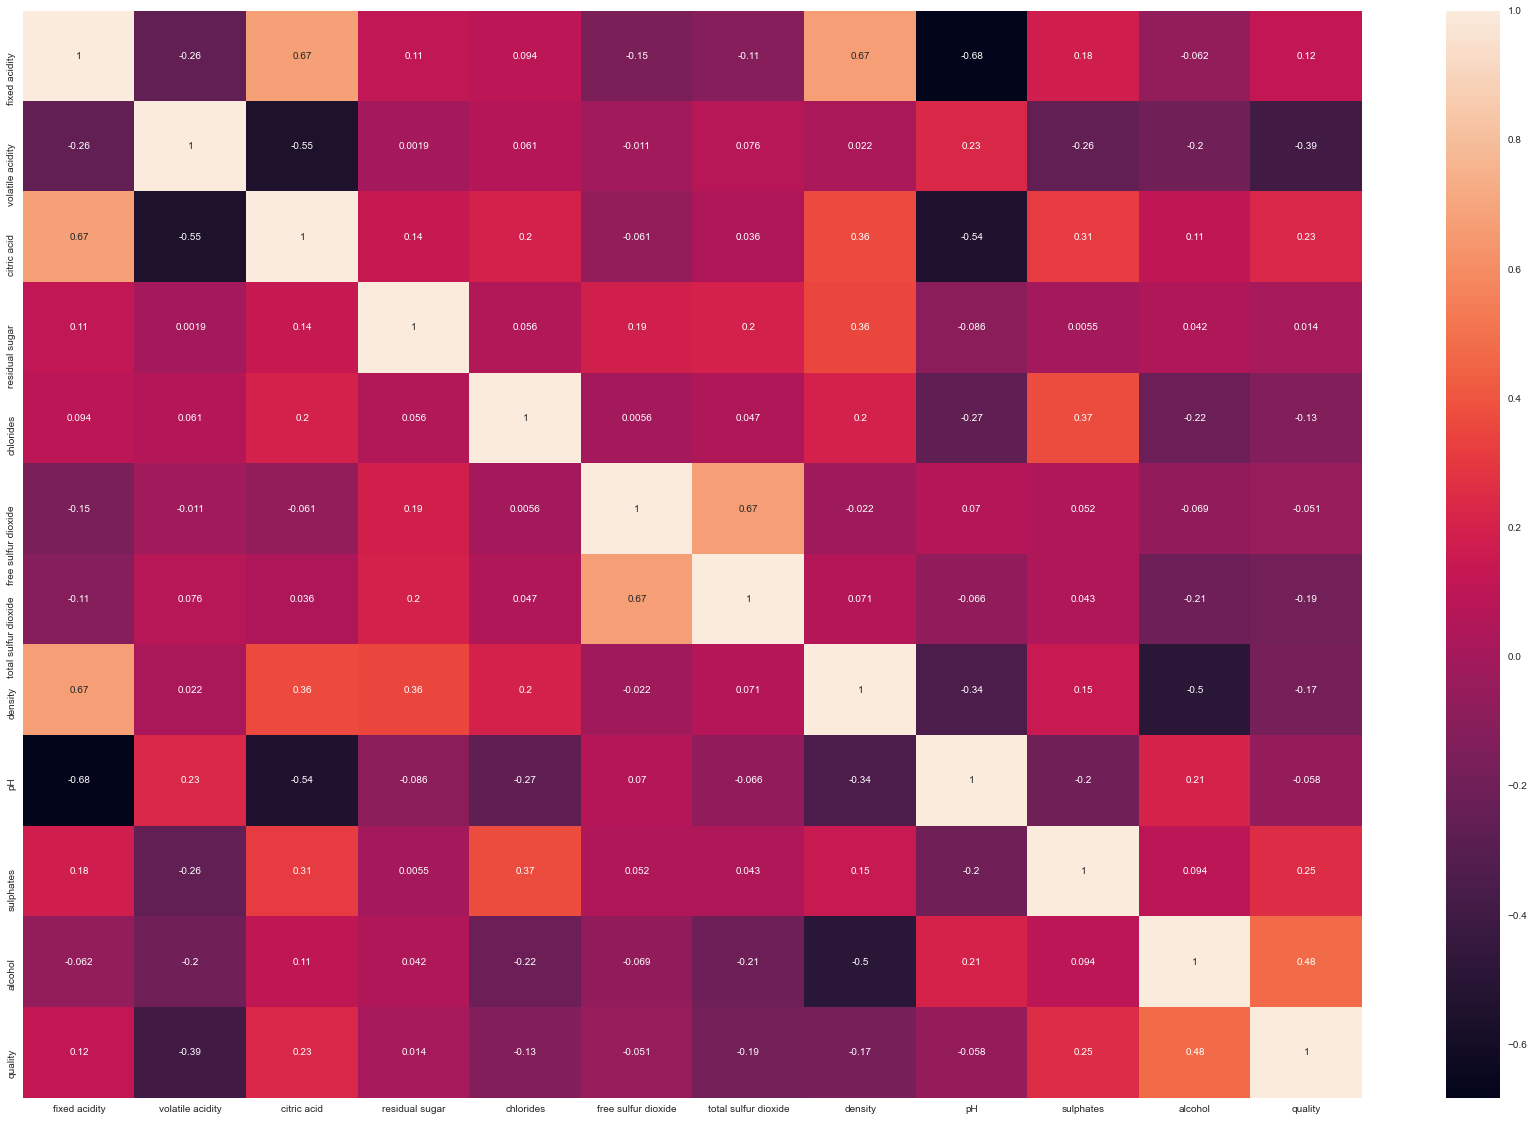

In [9]:
# correlation heatmaps

plt.figure(figsize = (30, 20))
corr_red = df_red.corr()
sns.heatmap(corr_red, annot = True)
plt.show()

Taking a look at quality (target variable) we conclude that alcohol is the most correlated feature. Let's print the correlations of alcohol with features

In [10]:
corr_red['quality'].drop('quality', axis = 0).sort_values(ascending = False)

alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

We assure once again that alcohol is the most correlated feature, next go sulphates and citric acid, but the correlation is weak.

Let's plot bar graph to see how the alcohol affects the wine quality.

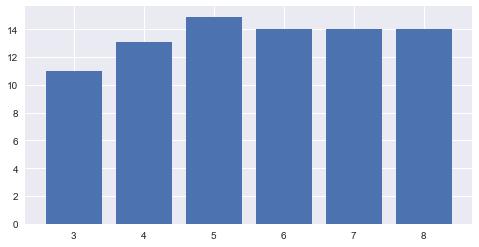

In [11]:
plt.figure(figsize = (8, 4))
plt.bar(x = df_red['quality'], height = df_red['alcohol'])
plt.show()

So, the worst quality - 3, has less alcohol, then with more alcohol wine quality increases. Nevertheless, the highest grades: 6, 7, 8 have the same percentage of alcohol and it is less then wine of quality 5.
    

Now, let's do the same for white wine to see if the features are correlated in the same way.

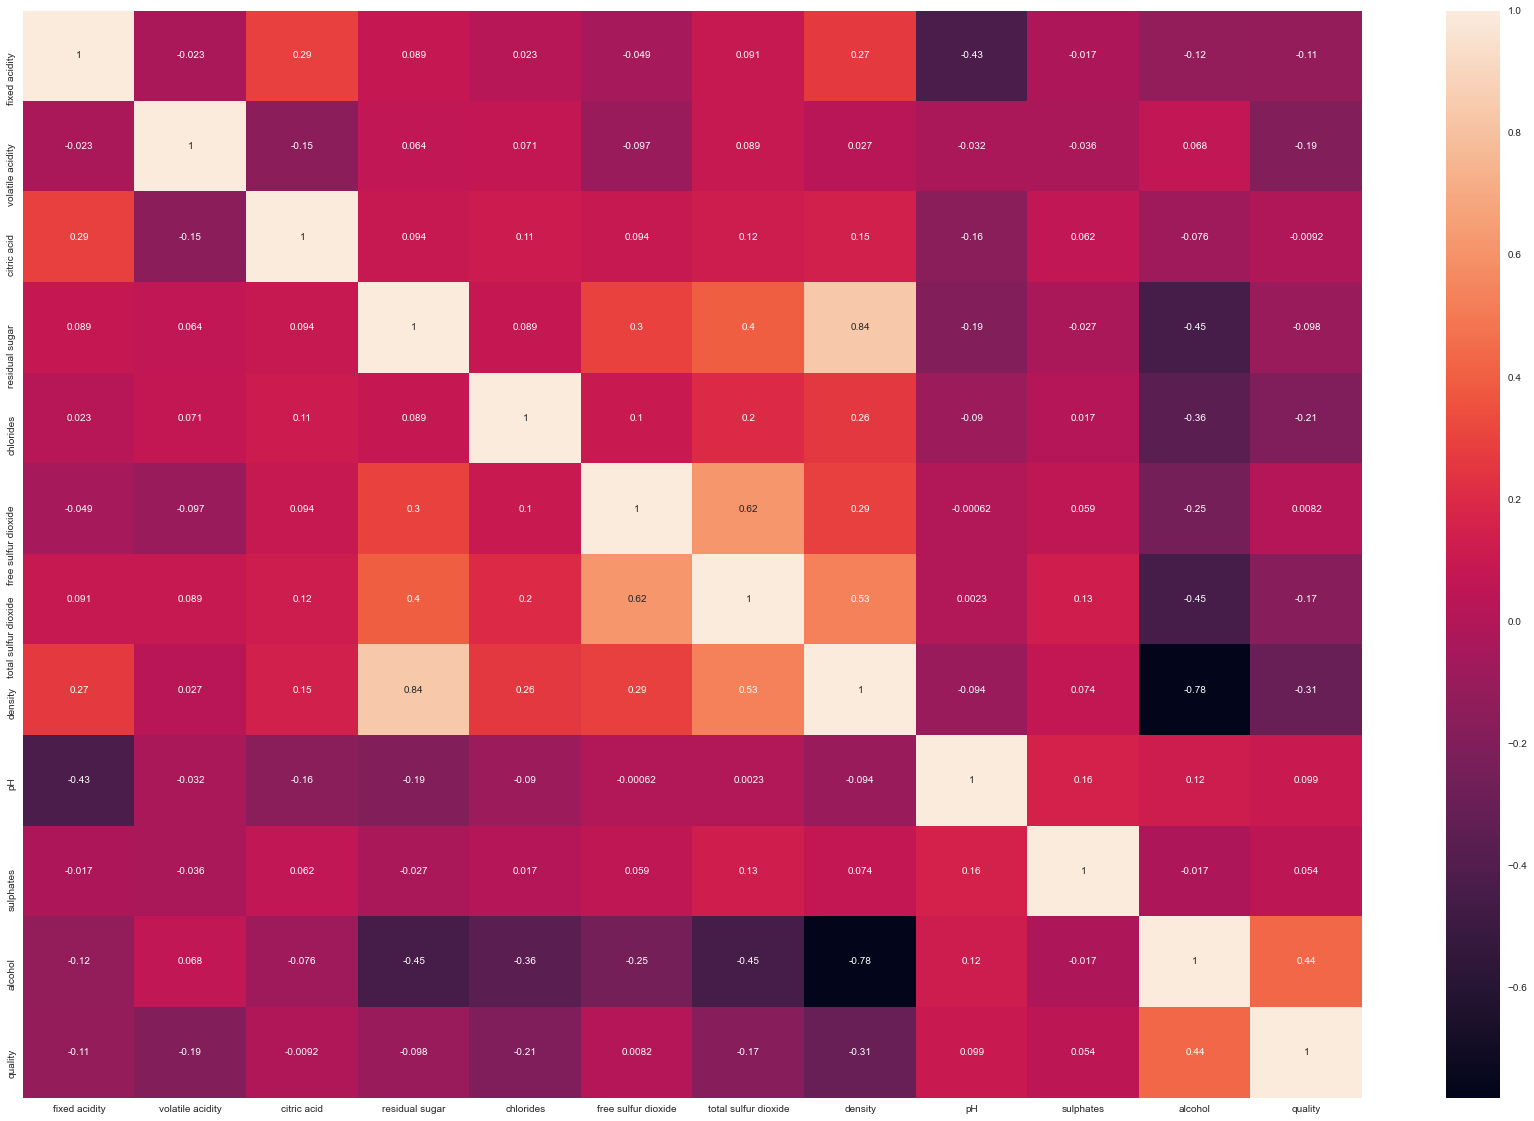

In [12]:
# correlation heatmaps

plt.figure(figsize = (30, 20))
corr_white = df_white.corr()
sns.heatmap(corr_white, annot = True)
plt.show()

In [13]:
corr_white['quality'].drop('quality', axis = 0).sort_values(ascending = False)

alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
free sulfur dioxide     0.008158
citric acid            -0.009209
residual sugar         -0.097577
fixed acidity          -0.113663
total sulfur dioxide   -0.174737
volatile acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64

Alcohol is still the most important feature in a dataset. Though, the second and third most important features have changed. For white wine they are pH and sulphates and they are much less correlated.

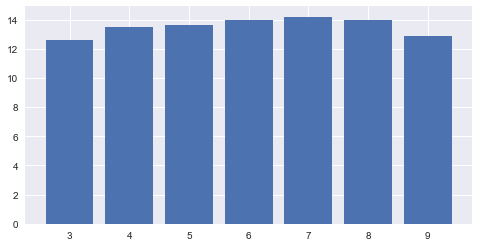

In [14]:
plt.figure(figsize = (8, 4))
plt.bar(x = df_white['quality'], height = df_white['alcohol'])
plt.show()

White wine follows the similar pattern, with more alcohol the quality increases but the best quality wine has slightly less alcohol percentage.

Let's now see how wines are distributed.

In [15]:
red_count = df_red.groupby('quality')['quality'].count()
white_count = df_white.groupby('quality')['quality'].count()

In [16]:
df_count = pd.DataFrame(data = {'Red wine': red_count, 'White wine': white_count})

In [17]:
df_count = df_count.fillna(0)
# df_count = df_count.reset_index()

In [18]:
df_count

,Red wine,White wine
quality,,
3,10.0,20
4,53.0,163
5,681.0,1457
6,638.0,2198
7,199.0,880
8,18.0,175
9,0.0,5


<Figure size 576x288 with 0 Axes>

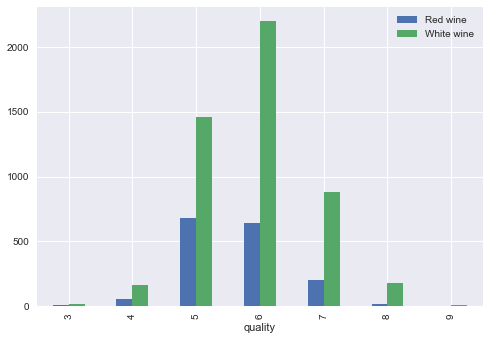

In [19]:
plt.figure(figsize = (8, 4))
df_count.plot.bar()
plt.show()

The proportions of wine quality/number of data observations is similar but white wine has more observations in total.

In [20]:
df_count['Red wine prop'] = df_count['Red wine'] / df_count['Red wine'].sum()

In [21]:
df_count['White wine prop'] = df_count['White wine'] / df_count['White wine'].sum()

In [22]:
df_count

,Red wine,White wine,Red wine prop,White wine prop
quality,,,,
3,10.0,20,0.006254,0.004083
4,53.0,163,0.033146,0.033279
5,681.0,1457,0.425891,0.297468
6,638.0,2198,0.398999,0.448755
7,199.0,880,0.124453,0.179665
8,18.0,175,0.011257,0.035729
9,0.0,5,0.000000,0.001021


In [23]:
df_count.loc[6, 'Red wine']

638.0

In [24]:
(df_count.loc[6, 'Red wine'] + df_count.loc[5, 'Red wine'] )/df_count['Red wine'].sum()

0.8248905565978737

The most frequent data quality types are 5 and 6: these types are 82% of the whole datset.

### Data processing

In [25]:
df_white.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [26]:
df_red.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

all feature variables are floats and the target is an int

Let's check for missing values in data

In [27]:
df_red.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [28]:
df_white.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no missing values in the datasets.

We will transform the data using Standard Scaler from sklearn library.

In [29]:
# scaler = StandardScaler()
scaler = MinMaxScaler()

In [30]:
type_wine = {
    3: 'bad',
    4: 'bad',
    5: 'bad',
    6: 'good',
    7: 'best',
    8: 'best',
    9: 'best'
    
}

Standard scaler standardizes features by removing the mean and dividing by standard deviation of each feature column.

In [31]:
df_red_features = df_red.drop('quality', axis = 1)
df_red_scaled = pd.DataFrame(scaler.fit_transform(df_red_features), columns= df_red_features.columns)

In [32]:
df_red_target = df_red[['quality']].copy()
df_red_target['quality'] = df_red_target['quality'].map(type_wine)
red_target = df_red_target['quality'].ravel()

In [33]:
print(len(df_red_target[df_red_target['quality'] == 'bad']))
print(len(df_red_target[df_red_target['quality'] == 'good']))
print(len(df_red_target[df_red_target['quality'] == 'best']))

744
638
217


In [34]:
red_train, red_test, red_target_train, red_target_test = train_test_split(df_red_scaled, red_target,
                                                                        test_size=0.3, stratify = red_target)

In [35]:
df_white_features = df_white.drop('quality', axis = 1)
df_white_scaled = pd.DataFrame(scaler.fit_transform(df_white_features), columns= df_white_features.columns)

In [36]:
df_white_target = df_white[['quality']].copy()
df_white_target['quality'] = df_white_target['quality'].map(type_wine)
white_target = df_white_target['quality'].ravel()

In [37]:
print(len(df_white_target[df_white_target['quality'] == 'bad']))
print(len(df_white_target[df_white_target['quality'] == 'good']))
print(len(df_white_target[df_white_target['quality'] == 'best']))

1640
2198
1060


In [38]:
white_train, white_test, white_target_train, white_target_test = train_test_split(df_white_scaled, white_target,
                                                                        test_size=0.3, stratify = white_target)

### Models

The idea is to train models separately on two datasets, then, combine them and train a model on a big dataset that will include two types of wine. Then, we'll compare the accuracy.

In [49]:
rf_model = RandomForestClassifier(n_estimators=500)
rf_model.fit(red_train, red_target_train)
score = rf_model.score(red_test, red_target_test)
print('Score on red wine dataset {:.2f}'.format(score))

Score on red wine dataset 0.74


In [51]:
rf_model = RandomForestClassifier(n_estimators=500)
rf_model.fit(white_train, white_target_train)
score = rf_model.score(white_test, white_target_test)
print('Score on white wine dataset {:.2f}'.format(score))

Score on white wine dataset 0.70
